<a href="https://colab.research.google.com/github/neo0801/MyCode/blob/master/torch_nn_and_cuda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Train with CPU

0it [00:00, ?it/s]

170500096it [00:07, 22743123.77it/s]                               


Extracting ./data/CIFAR10/cifar-10-python.tar.gz to ./data/CIFAR10
Files already downloaded and verified


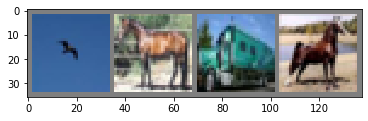

 bird horse truck horse
Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [0]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=True, 
                    download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                      shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=False,
                    download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,                 
                      shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# un-comment below code to enable GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # un-comment below code to enable GPU
        inputs, labels = data[0].to(device), data[1].to(device)
        #inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

PATH = './data/CIFAR10/cifar10_net.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 2.201
[1,  4000] loss: 1.857
[1,  6000] loss: 1.671
[1,  8000] loss: 1.589
[1, 10000] loss: 1.518
[1, 12000] loss: 1.438
[2,  2000] loss: 1.384
[2,  4000] loss: 1.359
[2,  6000] loss: 1.328
[2,  8000] loss: 1.292


In [0]:
dataiter = iter(testloader)
for _ in range(3):
  images, labels = dataiter.next()
  # print images
  imshow(torchvision.utils.make_grid(images))
  print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]]
                    for j in range(4)))
  outputs = net(images.to(device))
  _, predicted = torch.max(outputs, 1)
  print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                  for j in range(4)))